In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

from sklearn.preprocessing import MinMaxScaler
mc = MinMaxScaler()

pd.options.mode.chained_assignment = None  # default='warn'

# Wine

In [69]:
from sklearn.datasets import load_wine
ds = load_wine()

In [70]:
dataset = pd.DataFrame(ds['data'], columns=ds.feature_names)
dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


# Set X and y

In [71]:
X = dataset.iloc[:, :-1]
y = ds.target

In [72]:
dataset['wine_type'] = y

In [73]:
dataset['wine_type'].value_counts()

1    71
0    59
2    48
Name: wine_type, dtype: int64

# Visualizing the dataset 

<AxesSubplot:xlabel='wine_type', ylabel='count'>

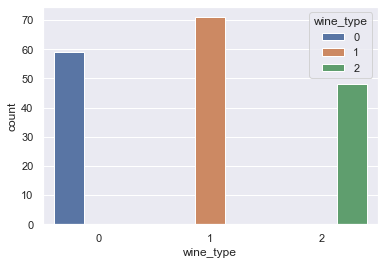

In [74]:
sns.set_theme(style="darkgrid")
sns.countplot(data=dataset, x = 'wine_type', hue = 'wine_type')

<AxesSubplot:xlabel='ash', ylabel='alcohol'>

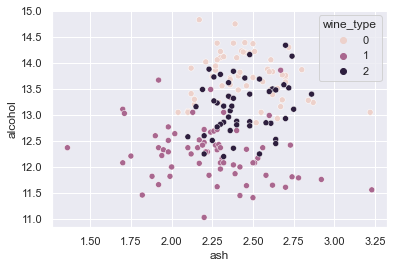

In [75]:
sns.scatterplot(data=dataset, x = 'ash', y ='alcohol', hue='wine_type')

<AxesSubplot:xlabel='ash', ylabel='Density'>

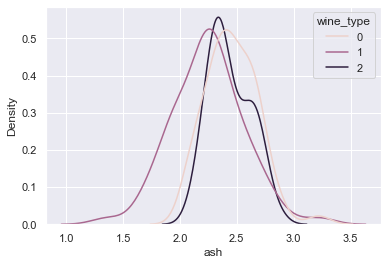

In [76]:
sns.kdeplot(data=dataset, x="ash", hue="wine_type")

In [77]:
dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


<AxesSubplot:xlabel='alcohol', ylabel='malic_acid'>

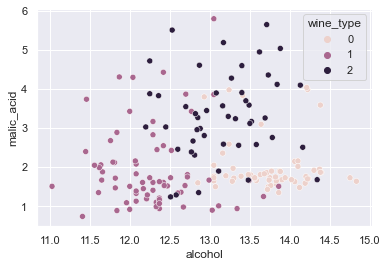

In [78]:
sns.scatterplot(data=dataset, x="alcohol", y="malic_acid", hue="wine_type")

<AxesSubplot:>

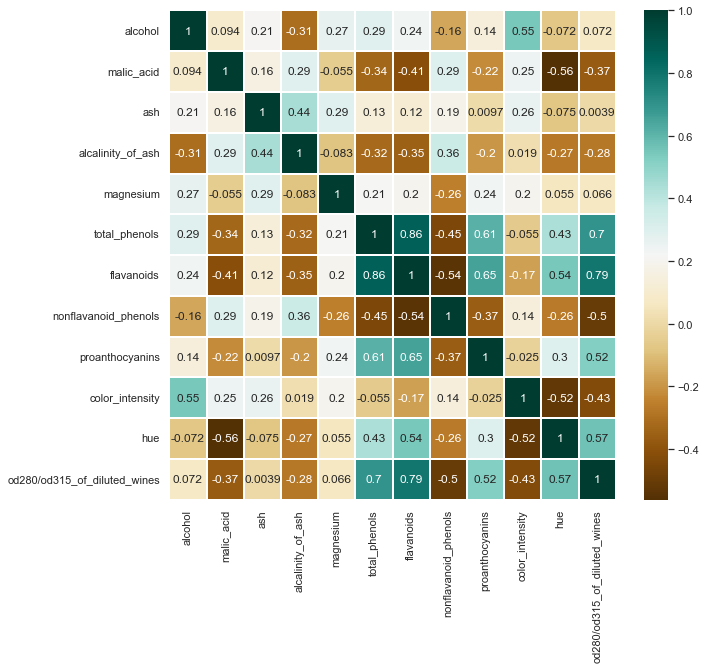

In [79]:
corr_matrix = X.corr()
plt.figure(figsize=(10, 9))
sns.heatmap(data = corr_matrix, cmap='BrBG', annot=True, linewidths=0.2)

* Dropping 'flavanoids' since it has high correlation relationship with the majority of featurers

In [80]:
# X = X.drop(columns=['flavanoids'])

* We can see that the dataset is non linear

In [81]:
dataset[['alcohol', 'malic_acid', 'ash', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 
'proanthocyanins', 'hue', 'od280/od315_of_diluted_wines']].var().mean()

0.47457391619233025

# Variance Threshold

* VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

In [82]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.47)
x_vt = X.copy()
x_vt = sel.fit_transform(x_vt)
x_vt

array([[14.23,  1.71, 15.6 , ...,  3.06,  5.64,  3.92],
       [13.2 ,  1.78, 11.2 , ...,  2.76,  4.38,  3.4 ],
       [13.16,  2.36, 18.6 , ...,  3.24,  5.68,  3.17],
       ...,
       [13.27,  4.28, 20.  , ...,  0.69, 10.2 ,  1.56],
       [13.17,  2.59, 20.  , ...,  0.68,  9.3 ,  1.62],
       [14.13,  4.1 , 24.5 , ...,  0.76,  9.2 ,  1.6 ]])

# Univariate feature selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method:

* SelectKBest removes all but the  highest scoring features

* SelectPercentile removes all but a user-specified highest scoring percentage of features

* using common univariate statistical tests for each feature: false positive rate SelectFpr, false discovery rate SelectFdr, or family wise error SelectFwe.

* GenericUnivariateSelect allows to perform univariate feature selection with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator.

In [83]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
x_u = X.copy()
print(x_u.shape)
x_u = SelectKBest(mutual_info_classif, k=8).fit_transform(x_u, y)
x_u.shape

(178, 12)


(178, 8)

# Recursive feature elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute (such as coef_, feature_importances_) or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

RFECV performs RFE in a cross-validation loop to find the optimal number of features.

c:\Users\PC10\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


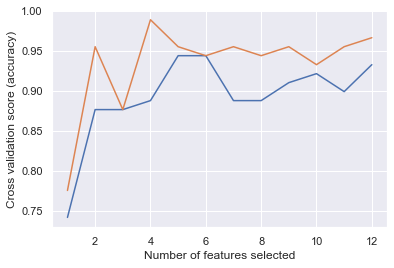

In [130]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
knn = KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p = 2)
svc = SVC(kernel = 'linear', random_state=0)
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
min_features_to_select = 1 # Minimum number of features to consider
rfecv = RFECV(
        estimator=rfc,
        step=1,
        cv = StratifiedKFold(2),
        scoring="accuracy",
        min_features_to_select=min_features_to_select,
    )

rfecv.fit(X, y)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [84]:
from sklearn.feature_selection import RFE
estimator = SVC(kernel='linear', random_state=0)
selector = RFE(estimator, n_features_to_select=6, step=1)
selector = selector.fit(X,y)
selector.ranking_

array([1, 3, 1, 4, 7, 2, 1, 1, 5, 1, 6, 1])

In [85]:
X_r = X.copy()
X_r.drop(X_r.columns[[1,3,4,5,8,10]], axis = 1, inplace = True)
X_r

,alcohol,ash,flavanoids,nonflavanoid_phenols,color_intensity,od280/od315_of_diluted_wines
0,14.23,2.43,3.06,0.28,5.64,3.92
1,13.20,2.14,2.76,0.26,4.38,3.40
2,13.16,2.67,3.24,0.30,5.68,3.17
3,14.37,2.50,3.49,0.24,7.80,3.45
4,13.24,2.87,2.69,0.39,4.32,2.93
...,...,...,...,...,...,...
173,13.71,2.45,0.61,0.52,7.70,1.74
174,13.40,2.48,0.75,0.43,7.30,1.56
175,13.27,2.26,0.69,0.43,10.20,1.56
176,13.17,2.37,0.68,0.53,9.30,1.62


# Feature selection as part of a pipeline

Feature selection is usually used as a pre-processing step before doing the actual learning. The recommended way to do this in scikit-learn is to use a Pipeline:

In [86]:
from sklearn.pipeline import Pipeline
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y, random_state=0)
pipe = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2))])
pipe.fit(X_train_p, y_train_p)

Pipeline(steps=[('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

In [87]:
pipe.score(X_test_p, y_test_p)

0.8888888888888888

In [88]:
# Variance Threshold
X_train_vt, X_test_vt, y_train_vt, y_test_vt = train_test_split(x_vt, y, test_size = 0.2, random_state = 0)

In [89]:
# Univariate feature selection
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(x_u, y, test_size = 0.2, random_state = 0)

In [90]:
# No Variance Threshold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [91]:
# Recursive feature elimination
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y, test_size = 0.2, random_state = 0)

In [92]:
def models_run(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame, ft_sc: bool) -> pd.DataFrame:    
    if ft_sc == 0:
        X_train = sc.fit_transform(X_train)
        X_test = sc.fit_transform(X_test)
    else:
        X_train = mc.fit_transform(X_train)
        X_test = mc.fit_transform(X_test)
    models = [
            ('LogReg', LogisticRegression(random_state=0)), 
            ('RF', RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)),
            ('KNN', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)),
            ('SVM', SVC(kernel='linear', random_state=2)), 
            ('Kernel SVM', SVC(kernel='rbf', random_state=3)),
            ('NB', GaussianNB()),
            ('DT', DecisionTreeClassifier(criterion = "entropy", random_state = 0))
            ]
    results = []
    names = []
    for name, model in models:
            clf = model.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            # print(name)
            names.append(name)
            acc_results = accuracy_score(y_test, y_pred)
            # pre_results = precision_score(y_test, y_pred)
            results.append(acc_results)
            # results.append(np.array(pre_results))
            # print(classification_report(y_test, y_pred, target_names=target_names))
            # print(confusion_matrix(y_test, y_pred))
    final = pd.DataFrame(results, names)
    final.columns=['Accuracy']
    return final

In [93]:
print("No Variance Threshold with Standardization")
none = models_run(X_train, y_train, X_test, y_test,0)
none

No Variance Threshold with Standardization


,Accuracy
LogReg,0.972222
RF,0.944444
KNN,0.972222
SVM,0.916667
Kernel SVM,0.944444
NB,0.888889
DT,0.944444


In [94]:
print("No Variance Threshold with Normalization")
none_m = models_run(X_train, y_train, X_test, y_test,1)
none_m

No Variance Threshold with Normalization


,Accuracy
LogReg,0.972222
RF,0.944444
KNN,0.944444
SVM,0.972222
Kernel SVM,0.916667
NB,0.916667
DT,0.888889


In [95]:
print("Variance Threshold with Standardization")
vt = models_run(X_train_vt, y_train_vt, X_test_vt, y_test_vt,0)
vt

Variance Threshold with Standardization


,Accuracy
LogReg,0.916667
RF,0.861111
KNN,0.916667
SVM,0.888889
Kernel SVM,0.916667
NB,0.861111
DT,0.972222


In [96]:
print("Variance Threshold with Normalization")
vt_m = models_run(X_train_vt, y_train_vt, X_test_vt, y_test_vt,1)
vt_m

Variance Threshold with Normalization


,Accuracy
LogReg,0.916667
RF,0.861111
KNN,0.916667
SVM,0.888889
Kernel SVM,0.944444
NB,0.861111
DT,0.916667


In [97]:
print("Univariate feature selection with Standardization")
u = models_run(X_train_u, y_train_u, X_test_u, y_test_u, 0)
u

Univariate feature selection with Standardization


,Accuracy
LogReg,0.888889
RF,0.833333
KNN,0.916667
SVM,0.888889
Kernel SVM,0.916667
NB,0.861111
DT,0.916667


In [98]:
print("Univariate feature selection with Normalization")
u_m = models_run(X_train_u, y_train_u, X_test_u, y_test_u, 1)
u_m

Univariate feature selection with Normalization


,Accuracy
LogReg,0.916667
RF,0.861111
KNN,0.916667
SVM,0.916667
Kernel SVM,0.888889
NB,0.861111
DT,0.805556


In [99]:
print("Recursive feature elimination with Standardization")
r = models_run(X_train_r, y_train_r, X_test_r, y_test_r, 0)
r

Recursive feature elimination with Standardization


,Accuracy
LogReg,0.888889
RF,0.916667
KNN,0.888889
SVM,0.888889
Kernel SVM,0.916667
NB,0.861111
DT,0.888889


In [100]:
print("Recursive feature elimination with Normalization")
r_m = models_run(X_train_r, y_train_r, X_test_r, y_test_r, 1)
r_m

Recursive feature elimination with Normalization


,Accuracy
LogReg,0.888889
RF,0.805556
KNN,0.888889
SVM,0.888889
Kernel SVM,0.944444
NB,0.888889
DT,0.805556


In [101]:
result = pd.DataFrame(columns = ["LogReg","RF", "KNN",	"SVM","Kernel SVM","NB","DT"], index = ['none', 'none_m', 'vt', 'vt_m', 'u', 'u_m', 'r', 'r_m'])

result.iloc[0,:] = none.iloc[:,0].values 
result.iloc[1,:] = none_m.iloc[:,0].values 
result.iloc[2,:] = vt.iloc[:,0].values 
result.iloc[3,:] = vt_m.iloc[:,0].values 
result.iloc[4,:] = u.iloc[:,0].values 
result.iloc[5,:] = u_m.iloc[:,0].values 
result.iloc[6,:] = r.iloc[:,0].values 
result.iloc[7,:] = r_m.iloc[:,0].values 


In [102]:
result

,LogReg,RF,KNN,SVM,Kernel SVM,NB,DT
none,0.972222,0.944444,0.972222,0.916667,0.944444,0.888889,0.944444
none_m,0.972222,0.944444,0.944444,0.972222,0.916667,0.916667,0.888889
vt,0.916667,0.861111,0.916667,0.888889,0.916667,0.861111,0.972222
vt_m,0.916667,0.861111,0.916667,0.888889,0.944444,0.861111,0.916667
u,0.888889,0.833333,0.916667,0.888889,0.916667,0.861111,0.916667
u_m,0.916667,0.861111,0.916667,0.916667,0.888889,0.861111,0.805556
r,0.888889,0.916667,0.888889,0.888889,0.916667,0.861111,0.888889
r_m,0.888889,0.805556,0.888889,0.888889,0.944444,0.888889,0.805556


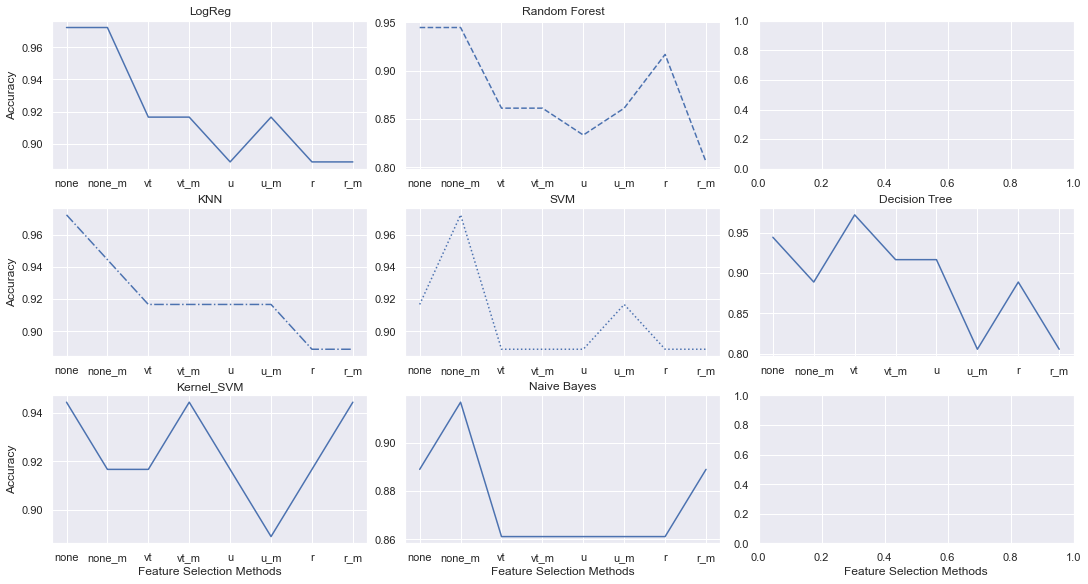

In [103]:
x = result.index

LogReg = result.iloc[:,0]
RF = result.iloc[:,1]
KNN = result.iloc[:,2]
SVM = result.iloc[:,3]
Kernel_SVM = result.iloc[:,4]
NB = result.iloc[:,5]
DT = result.iloc[:,6]

fig, ax = plt.subplots(3,3, figsize=(15,8), constrained_layout=True)

ax[0,0].plot(x, LogReg, label = "LogReg", linestyle="-")
ax[0,0].set_title('LogReg')

ax[0,1].plot(x, RF, label = "Random Forest", linestyle="--")
ax[0,1].set_title('Random Forest')

ax[1,0].plot(x, KNN, label = "KNN", linestyle="-.")
ax[1,0].set_title('KNN')

ax[1,1].plot(x, SVM, label = "SVM", linestyle=":")
ax[1,1].set_title('SVM')

ax[2,0].plot(x, Kernel_SVM, label = "Kernel_SVM")
ax[2,0].set_title('Kernel_SVM')

ax[2,1].plot(x, NB, label = "Naive Bayes")
ax[2,1].set_title('Naive Bayes')

ax[1,2].plot(x, DT, label = "Decision Tree")
ax[1,2].set_title('Decision Tree')

plt.setp(ax[-1, :], xlabel='Feature Selection Methods')
plt.setp(ax[:, 0], ylabel='Accuracy')

plt.show()